# TMDrefined Preds for arithmetic mean with threshold = 2

In [1]:
#imports
import numpy as np
import pandas as pd
import os
import glob
import scripts.ML_TMDrefined as ml_ref
import scripts.Translate_TMDrefined as t_ref
import scripts.StandardConfig as stdc

In [2]:
# get all the files
path, path_module, sep = stdc.find_folderpath()
path_labels = f"{path}{sep}test_train_N{sep}"
list_df_analysis_tags = glob.glob(f"{path_labels}*.xlsx")
list_df_analysis_tags

['/home/freiherr/PycharmProjects/TMDrefined/N_out_refinement/test_train_N/N2_test.xlsx',
 '/home/freiherr/PycharmProjects/TMDrefined/N_out_refinement/test_train_N/N2_train.xlsx']

## N-term Pred with threshold 2 for arithmetic mean

In [3]:
test_am_N2 = pd.read_excel('/home/freiherr/PycharmProjects/TMDrefined/N_out_refinement/test_train_N/N2_test.xlsx').set_index("ID")
train_am_N2 = pd.read_excel('/home/freiherr/PycharmProjects/TMDrefined/N_out_refinement/test_train_N/N2_train.xlsx').set_index("ID")
top60n1 = pd.read_excel('/home/freiherr/PycharmProjects/TMDrefined/N_out_refinement/CPP_top60_n=1/norm_top_of_60.xlsx').set_index("AA")

In [4]:
top60n1.head(15)

,ARGP820103,BUNA790103,BURA740102,CHAM820102,CHAM830102,CHAM830103,CHAM830105,CHOP780101,CHOP780204,CHOP780206,...,KARS160110,KARS160112,KARS160118,KARS160119,KARS160120,KARS160122,LINS030105,LINS030109,KOEH090110,KOEH090112
AA,,,,,,,,,,,,,,,,,,,,,
A,0.504,0.691,0.264,0.262,0.182,0.0,0.000,0.174,0.425,0.298,...,0.863,0.697,0.429,0.205,0.952,0.000,0.111,0.149,0.140,0.345
C,0.387,0.819,1.000,0.947,0.442,0.5,0.000,0.661,0.110,0.256,...,0.557,0.697,1.000,0.863,0.952,0.500,0.000,0.000,0.285,1.000
D,0.000,0.745,0.213,0.601,0.397,0.5,0.000,0.908,0.790,0.529,...,0.293,0.473,0.566,0.889,0.952,0.247,0.200,0.809,0.919,0.440
E,0.032,0.745,0.186,0.561,0.017,0.5,0.667,0.248,1.000,0.579,...,0.396,0.311,0.544,0.893,0.952,0.152,0.400,0.894,0.913,0.681
F,0.670,1.000,0.354,0.462,0.354,0.5,0.667,0.119,0.085,0.488,...,0.208,0.139,0.429,0.821,0.952,0.169,0.133,0.000,0.029,0.017
G,0.170,0.596,0.336,0.240,0.470,0.0,0.000,1.000,0.160,0.884,...,0.863,0.393,0.000,0.000,0.952,0.000,0.133,0.298,0.221,0.112
H,0.053,0.851,0.000,0.313,0.514,0.5,0.667,0.440,0.145,0.727,...,0.355,0.213,0.206,0.708,0.562,0.134,0.400,0.489,0.651,0.267
I,0.543,0.745,0.634,0.424,0.633,1.0,0.000,0.000,0.115,0.364,...,0.033,0.163,0.429,0.733,0.583,0.281,0.044,0.000,0.029,0.276
K,0.004,0.691,0.195,0.313,0.376,0.5,0.667,0.495,0.110,0.554,...,0.433,0.312,0.458,0.647,0.912,0.114,1.000,1.000,1.000,0.405


In [5]:
train_am_N2

,window_left,window_right,label,start_pos_TMD,norm_intersect_pos
ID,,,,,
INAR2_HUMAN__0,ESAK,IGGI,1,244,0.473786
INAR2_HUMAN__-1,AESA,KIGG,1,243,0.471845
INAR2_HUMAN__1,SAKI,GGII,0,245,0.475728
INAR2_HUMAN__-2,SAES,AKIG,0,242,0.469903
INAR2_HUMAN__2,AKIG,GIIT,0,246,0.477670
...,...,...,...,...,...
KLOTB_HUMAN__-1,VQKK,PLIF,0,996,0.954023
KLOTB_HUMAN__1,KKPL,IFLG,0,998,0.955939
KLOTB_HUMAN__-2,LVQK,KPLI,0,995,0.953065


In [6]:
test_am_N2.columns

Index(['window_left', 'window_right', 'label', 'start_pos_TMD',
       'norm_intersect_pos'],
      dtype='object')

In [7]:
columns_60_1 = top60n1.columns.tolist()[:3]

In [8]:
aaontology_colors = {'ASA/Volume': [54,128,180], 
                     'Polarity': [253,220,34], 
                     'Structure-Activity': [140,94,86], 
                     'Composition': [255,146,50],
                     'Others': [127,127,127], 
                     'Shape': [55,192,206], 
                     'Conformation': [61,159,71],
                     'Energy': [213,65,65]
                    }

In [9]:
aaontology_colors_hex = {'ASA/Volume': "#3680b4", 
                         'Polarity': "#fddc22", 
                         'Structure-Activity': "#8c5e56", 
                         'Composition': "#ff9232",
                         'Others': "#7f7f7f", 
                         'Shape': "#37c0ce", 
                         'Conformation': "#3d9f47",
                         'Energy': "#d54141"
                        }

In [10]:
# now the BIG algorithm, get all the treeeeeez

Begin process make_forest:  11:51:22
Begin process aa_numeric_by_scale:  11:51:22
End process aa_numeric_by_scale:  11:51:28
Process time: 6.19 seconds
given parameters: {'bootstrap': [True], 'ccp_alpha': [0], 'class_weight': ['balanced_subsample'], 'criterion': ['entropy'], 'max_depth': [26], 'max_leaf_nodes': [200], 'max_samples': [0.3], 'n_estimators': [730], 'n_jobs': [-1], 'verbose': [0]} with HalvingGridSearchCV gave following best-performing parameter combi:best params: {'bootstrap': True, 'ccp_alpha': 0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 26, 'max_leaf_nodes': 200, 'max_samples': 0.3, 'n_estimators': 730, 'n_jobs': -1, 'verbose': 0}
End process make_forest:  11:51:38
Process time: 16.28 seconds
['ARGP820103', 'BURA740102', 'BUNA790103']


/home/freiherr/PycharmProjects/TMDrefined/scripts/ML_TMDrefined.py:168: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scale_labels, rotation=45, ha="right", fontweight="bold")


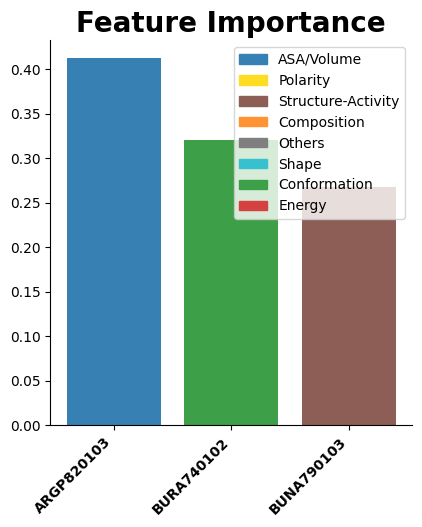

In [11]:
#best_params= {'bootstrap': [True], 'class_weight': ['balanced'], 'criterion': ['gini'], 'max_depth': [15], 'max_leaf_nodes': [20], 'n_estimators': [340], 'n_jobs': [6]}
#param_grid = {'bootstrap': [True], 'ccp_alpha': [0], 'class_weight': ['balanced_subsample'], 'criterion': ['gini'], 'max_depth': [10], 'max_leaf_nodes': [80], 'max_samples': [0.6], 'n_estimators': [300], 'n_jobs': [-1], 'verbose': [0]}
param_grid = {'bootstrap': [True], 'ccp_alpha': [0], 'class_weight': ['balanced_subsample'], 'criterion': ['entropy'], 'max_depth': [26], 'max_leaf_nodes': [200], 'max_samples': [0.3], 'n_estimators': [730], 'n_jobs': [-1], 'verbose': [0]}
AM_N2_forest = ml_ref.ForestTMDrefind.make_forest(train_am_N2[['window_left', 'window_right']], train_am_N2["label"], scales_list=columns_60_1,  job_name="experimental_border", n_jobs=-1, param_grid=param_grid, model_retrains=1)
AM_N2_forest.fetch_a_tree()
AM_N2_forest.hyperparameter_summary(save_table=True)
AM_N2_forest.feature_importance()

In [12]:
test_labels_pred = AM_N2_forest.predict_labels(test_am_N2[['window_left', 'window_right']]) 

Begin process aa_numeric_by_scale:  11:51:40
End process aa_numeric_by_scale:  11:51:40
Process time: 0.22 seconds


Accuracy: 0.7446808510638298
Precision: 0.4
Recall: 0.7692307692307693
F1:  0.5263157894736842


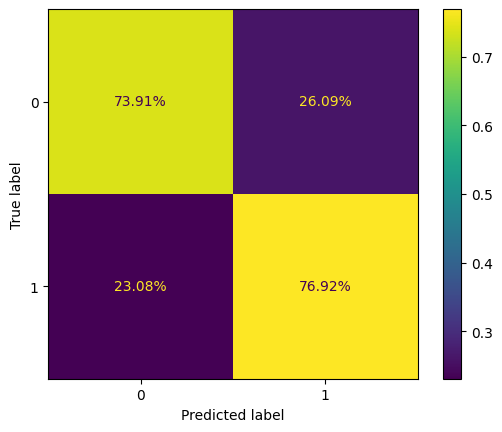

In [13]:
AM_N2_forest.test_predict_quality(label_test=test_am_N2["label"], label_pred=test_labels_pred[0], cm_save=True)

In [14]:
# P05067, APP, 701
seq = "MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDSDPSGTKTCIDTKEGILQYCQEVYPELQITNVVEANQPVTIQNWCKRGRKQCKTHPHFVIPYRCLVGEFVSDALLVPDKCKFLHQERMDVCETHLHWHTVAKETCSEKSTNLHDYGMLLPCGIDKFRGVEFVCCPLAEESDNVDSADAEEDDSDVWWGGADTDYADGSEDKVVEVAEEEEVAEVEEEEADDDEDDEDGDEVEEEAEEPYEEATERTTSIATTTTTTTESVEEVVREVCSEQAETGPCRAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCGSAMSQSLLKTTQEPLARDPVKLPTTAASTPDAVDKYLETPGDENEHAHFQKAKERLEAKHRERMSQVMREWEEAERQAKNLPKADKKAVIQHFQEKVESLEQEAANERQQLVETHMARVEAMLNDRRRLALENYITALQAVPPRPRHVFNMLKKYVRAEQKDRQHTLKHFEHVRMVDPKKAAQIRSQVMTHLRVIYERMNQSLSLLYNVPAVAEEIQDEVDELLQKEQNYSDDVLANMISEPRISYGNDALMPSLTETKTTVELLPVNGEFSLDDLQPWHSFGADSVPANTENEVEPVDARPAADRGLTTRPGSGLTNIKTEEISEVKMDAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIATVIVITLVMLKKKQYTSIHHGVVEVDAAVTPEERHLSKMQQNGYENPTYKFFEQMQN"

            ID window_left window_right  label  pos_in_seq  norm_intersect_pos
0     query__0        SNKG         AIIG      0         701            0.910390
1    query__-1        GSNK         GAII      0         700            0.909091
2     query__1        NKGA         IIGL      0         702            0.911688
3    query__-2        VGSN         KGAI      0         699            0.907792
4     query__2        KGAI         IGLM      0         703            0.912987
5    query__-3        DVGS         NKGA      0         698            0.906494
6     query__3        GAII         GLMV      0         704            0.914286
7    query__-4        EDVG         SNKG      0         697            0.905195
8     query__4        AIIG         LMVG      0         705            0.915584
9    query__-5        AEDV         GSNK      0         696            0.903896
10    query__5        IIGL         MVGG      0         706            0.916883
11   query__-6        FAED         VGSN      0      

['APP', 702]

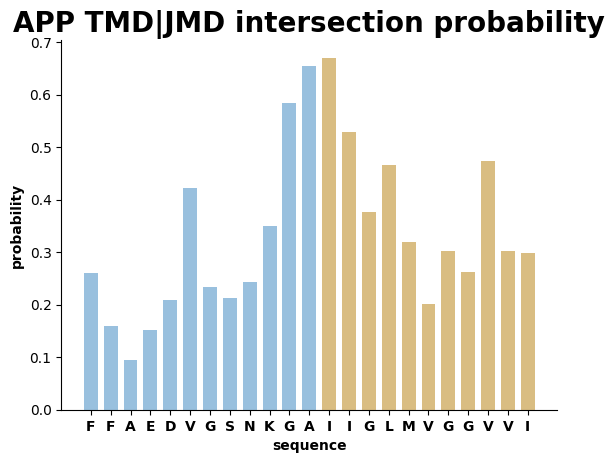

In [15]:
AM_N2_forest.pred_from_seq("APP", seq, 701)

628
            ID window_left window_right  label  pos_in_seq  norm_intersect_pos
0     query__0        FGDE            C      0         628            1.000000
1    query__-1        GFGD           EC      0         627            0.998408
2     query__1        GDEC                   0         629            1.001592
3    query__-2        GGFG          DEC      0         626            0.996815
4     query__2         DEC                   0         630            1.003185
5    query__-3        SGGF         GDEC      0         625            0.995223
6     query__3          EC                   0         631            1.004777
7    query__-4        GSGG         FGDE      0         624            0.993631
8     query__4           C                   0         632            1.006369
9    query__-5        GGSG         GFGD      0         623            0.992038
10    query__5                               0         633            1.007962
11   query__-6        RGGS         GGFG      0  

['BCAM', 627]

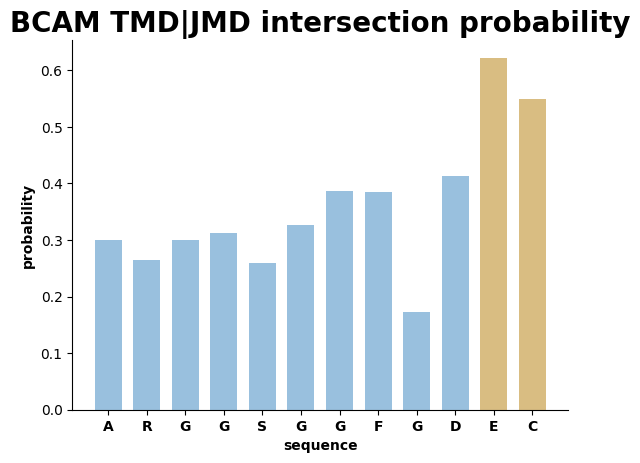

In [16]:
seq = "MEPPDAPAQARGAPRLLLLAVLLAAHPDAQAEVRLSVPPLVEVMRGKSVILDCTPTGTHDHYMLEWFLTDRSGARPRLASAEMQGSELQVTMHDTRGRSPPYQLDSQGRLVLAEAQVGDERDYVCVVRAGAAGTAEATARLNVFAKPEATEVSPNKGTLSVMEDSAQEIATCNSRNGNPAPKITWYRNGQRLEVPVEMNPEGYMTSRTVREASGLLSLTSTLYLRLRKDDRDASFHCAAHYSLPEGRHGRLDSPTFHLTLHYPTEHVQFWVGSPSTPAGWVREGDTVQLLCRGDGSPSPEYTLFRLQDEQEEVLNVNLEGNLTLEGVTRGQSGTYGCRVEDYDAADDVQLSKTLELRVAYLDPLELSEGKVLSLPLNSSAVVNCSVHGLPTPALRWTKDSTPLGDGPMLSLSSITFDSNGTYVCEASLPTVPVLSRTQNFTLLVQGSPELKTAEIEPKADGSWREGDEVTLICSARGHPDPKLSWSQLGGSPAEPIPGRQGWVSSSLTLKVTSALSRDGISCEASNPHGNKRHVFHFGTVSPQTSQAGVAVMAVAVSVGLLLLVVAVFYCVRRKGGPCCRQRREKGAPPPGEPGLSHSGSEQPEQTGLLMGGASGGARGGSGGFGDEC"
print(len(seq))
AM_N2_forest.pred_from_seq("BCAM", seq, 628)